In [1]:
import astropy.coordinates as coord
from astropy.table import QTable, vstack

import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad
import pandas as pd
import pickle
import os


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import pandas as pd 

In [3]:
from fieldstars import fieldstars as fs

In [4]:
fstars = fs('alpha-per vicinity')
fstars.conesearch(52.074625695066345*u.degree, 48.932707471347136*u.degree, 1.0*u.degree, plx_error_thresh=5, r_est=(175,185))

In [5]:
print(fstars.tap_query_string)

SELECT 
		 source_id
		,ra
		,dec
		,parallax
		,pmra
		,pmdec
		,radial_velocity
		,phot_g_mean_mag
		,phot_bp_mean_mag
		,phot_rp_mean_mag
		,r_est
FROM gaiadr2_complements.geometric_distance gd
	INNER JOIN gaiadr2.gaia_source gs using (source_id) 
WHERE 
	CONTAINS(POINT('', gs.ra, gs.dec), 
		CIRCLE('', 52.074625695066345, 48.932707471347136, 1.0)) = 1 
	AND gd.r_est BETWEEN 175 AND 185
	AND parallax_over_error >= 5


In [6]:
fstars.name

'alpha-per vicinity'

In [7]:
len(fstars.objs)

89

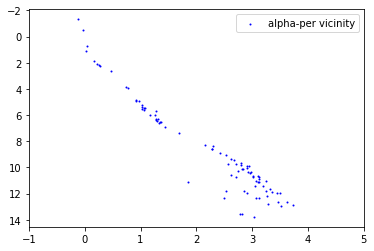

In [8]:
fstars.plot_hrdiagram()

In [9]:
fstars.objs.ra.mean(), fstars.objs.dec.mean()

(51.87527679521976, 48.939076757482255)

In [10]:
ra_bar = fstars.objs.ra.mean(); dec_bar = fstars.objs.dec.mean()
r = np.sqrt((fstars.objs.ra-ra_bar)**2 + (fstars.objs.dec-dec_bar)**2)

(array([ 7.,  4., 14., 12., 14., 12., 11.,  7.,  6.,  2.]),
 array([0.18506579, 0.31908812, 0.45311044, 0.58713277, 0.72115509,
        0.85517742, 0.98919974, 1.12322207, 1.25724439, 1.39126672,
        1.52528904]),
 <a list of 10 Patch objects>)

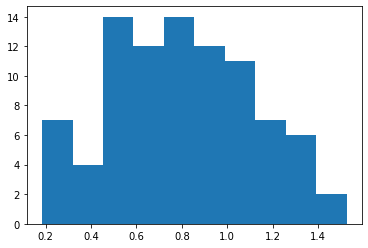

In [11]:
plt.hist(r)

In [12]:
clust_c = SkyCoord(ra=52.074625695066345*u.degree, dec =  48.932707471347136*u.degree )

In [13]:
clust_c

<SkyCoord (ICRS): (ra, dec) in deg
    (52.0746257, 48.93270747)>

In [14]:
objs_c = SkyCoord(ra=np.array(fstars.objs.ra)*u.degree, dec=np.array(fstars.objs.dec)*u.degree)

In [15]:
sep = clust_c.separation(objs_c)

(array([ 3.,  5.,  5.,  5.,  9., 15., 15.,  8., 13., 11.]),
 array([0.08972334, 0.18029505, 0.27086676, 0.36143847, 0.45201018,
        0.54258188, 0.63315359, 0.7237253 , 0.81429701, 0.90486872,
        0.99544043]),
 <a list of 10 Patch objects>)

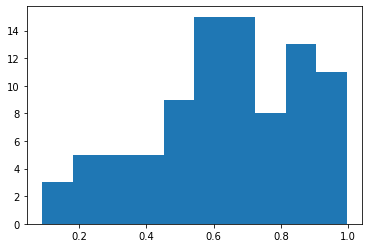

In [16]:
plt.hist(sep.value)